STEP 1: IMPORTING REQUIRED LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

STEP 2: LOADING THE DATASET

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Supermart Grocery Sales - Retail Analytics Dataset.csv to Supermart Grocery Sales - Retail Analytics Dataset.csv


In [8]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [9]:
df.head() #printing first five data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


STEP 3: DATA PREPROSSING

In [10]:
#checking for any null values

In [11]:
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [12]:
#Droping duplicates
df=df.drop_duplicates()

In [13]:
#Converting date column to date time format

In [14]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

In [15]:
# ENCODING CATEGORICAL COLUMNS
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
    df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

STEP 3: EXPLORATORY DATA ANALYSIS

<ipython-input-16-f5359e151ba1>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date').sum(numeric_only=True)


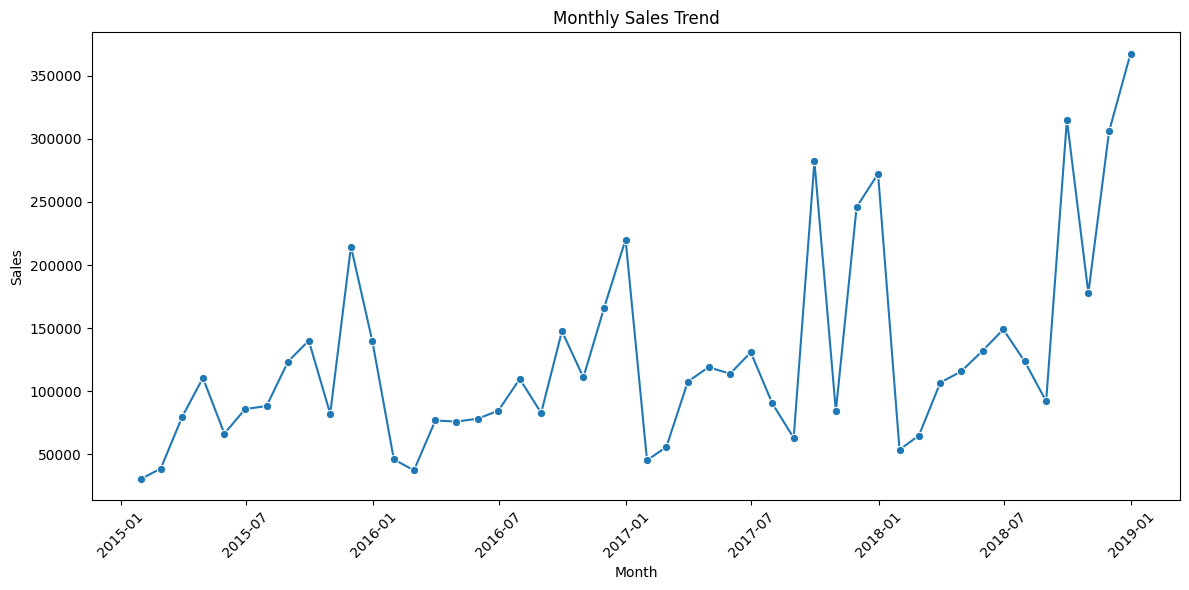

In [16]:
# MONTHLY SALES TREND

monthly_sales = df.resample('M', on='Order Date').sum(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

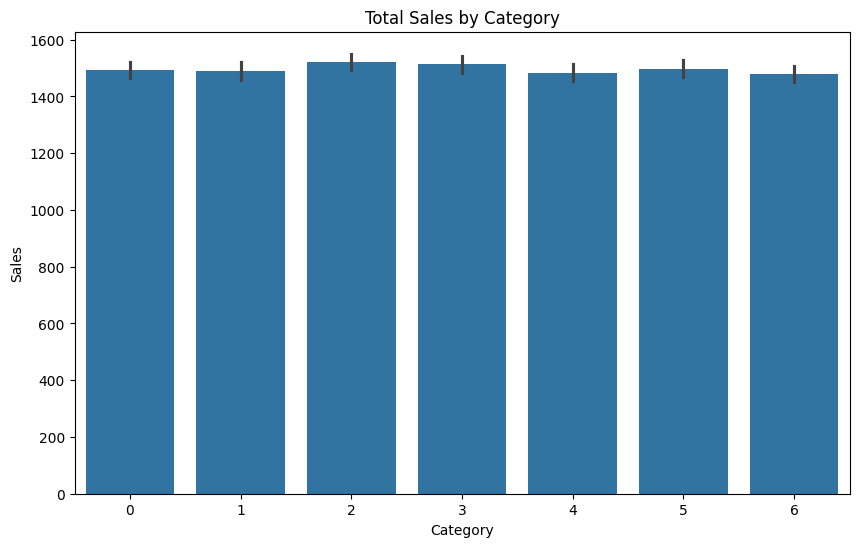

In [17]:
# SALES BY CATEGORY
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Sales',data=df)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

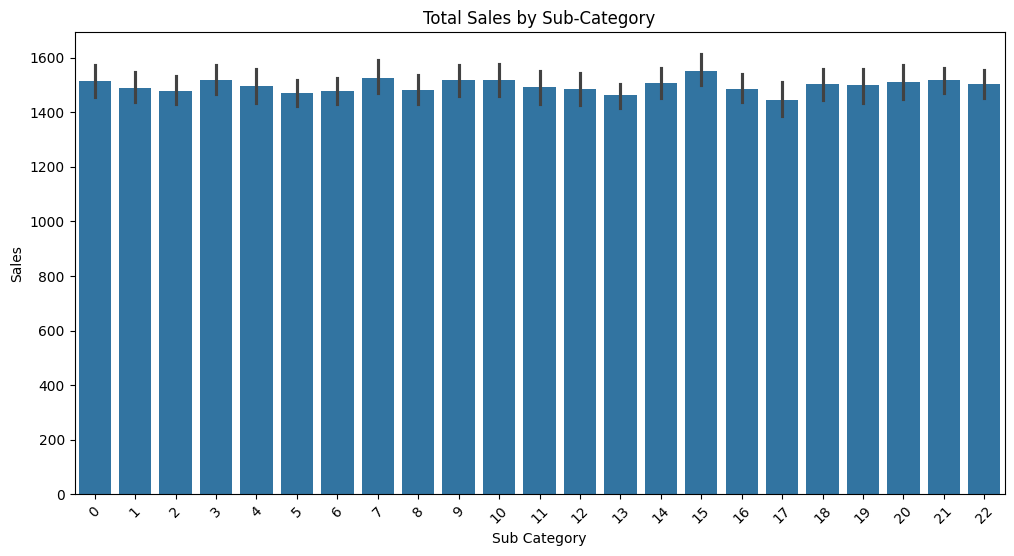

In [18]:
# TOTAL SALES BY SUB-CATEGORY
plt.figure(figsize=(12,6))
sns.barplot(x='Sub Category',y='Sales',data=df)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

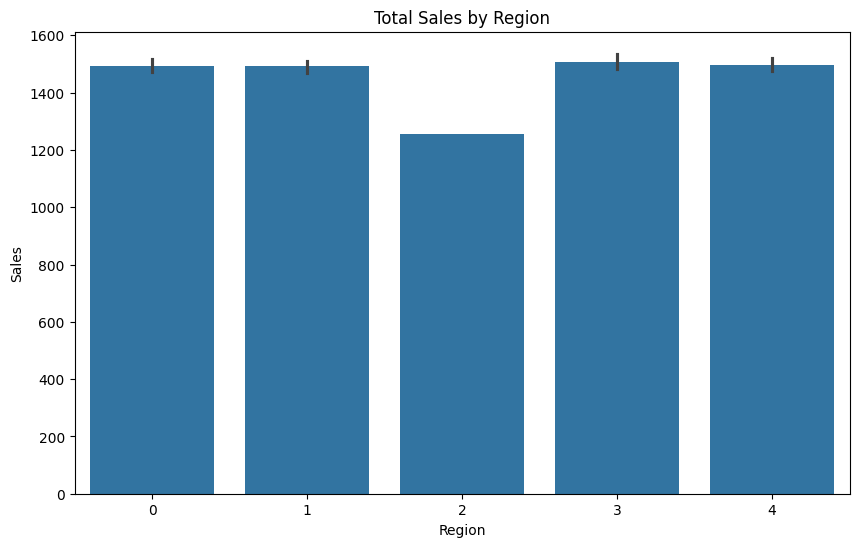

In [19]:
# REGION WISE SALES
plt.figure(figsize=(10,6))
sns.barplot(x='Region',y='Sales',data=df)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

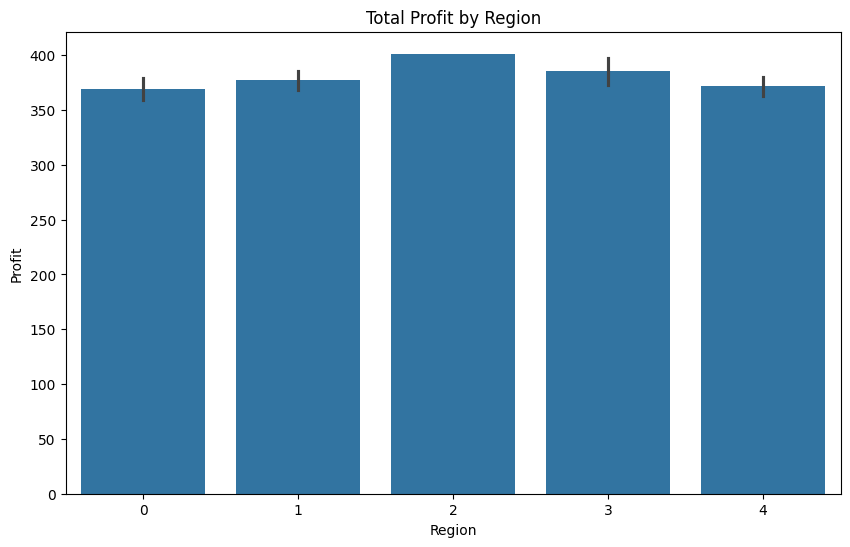

In [20]:
# REGION WISE PROFIT
plt.figure(figsize=(10,6))
sns.barplot(x='Region',y='Profit',data=df)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

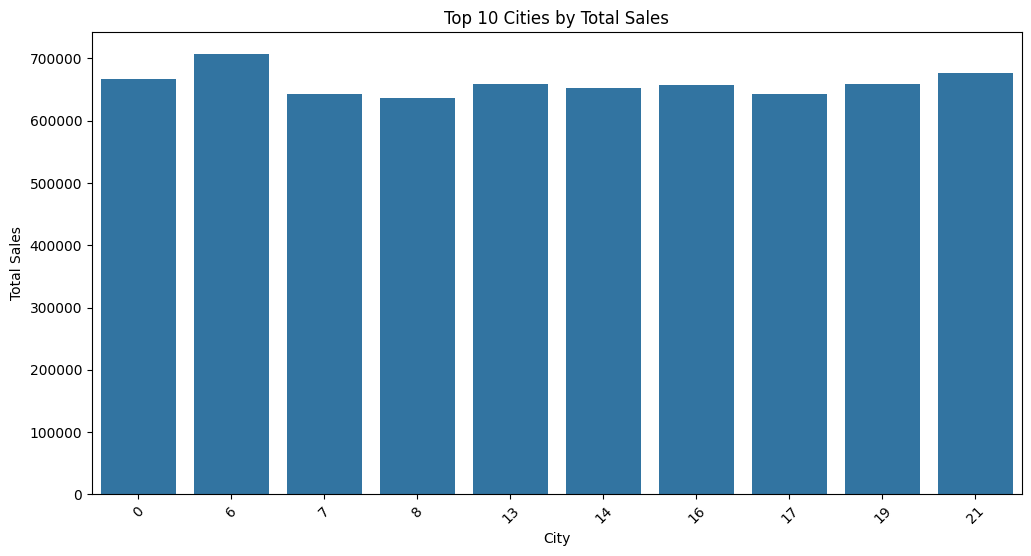

In [21]:
# TOP 10 CITIES BY TOTAL SALES
plt.figure(figsize=(12,6))
top_cities = df.groupby('City')['Sales'].sum().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

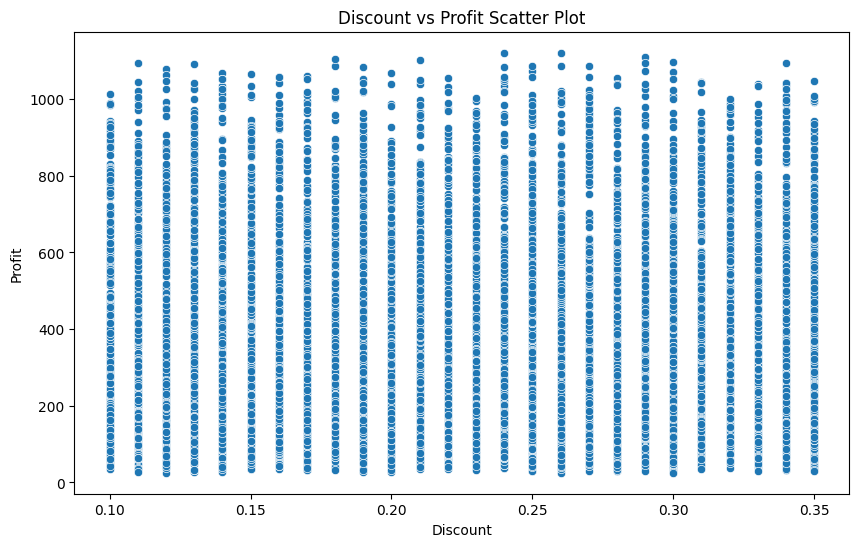

In [22]:
# DISCOUNT VS PROFIT SCATTER PLOT
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount',y='Profit',data=df)
plt.title('Discount vs Profit Scatter Plot')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


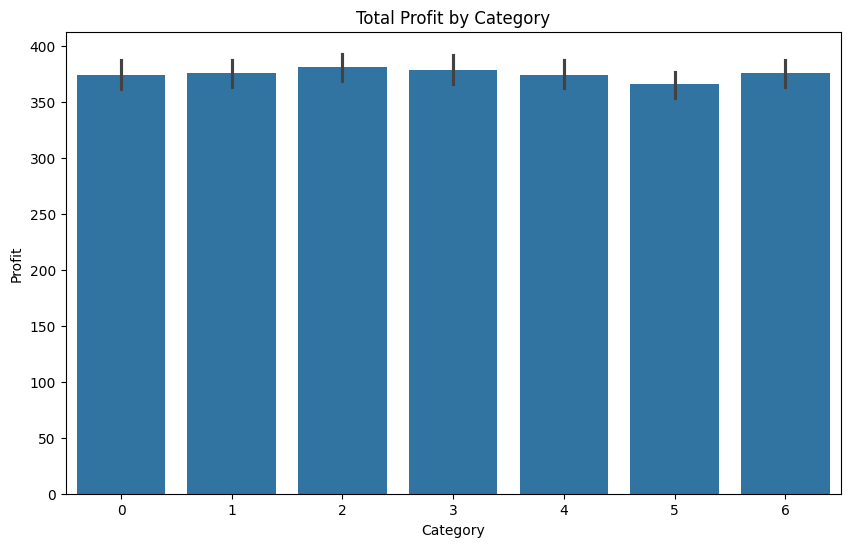

In [23]:
# PROFIT BY CATEGORY
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Profit',data=df)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

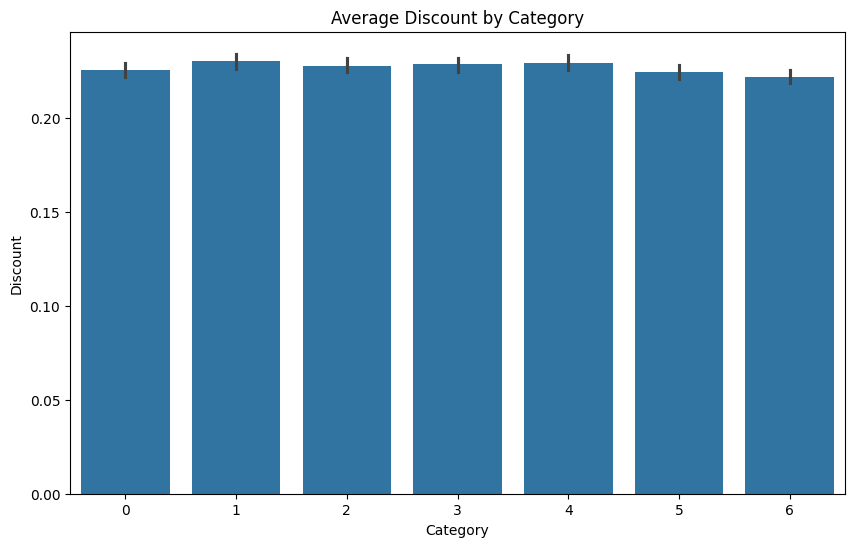

In [24]:
# AVERAGE DISCOUNT BY CATEGORY
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Discount',data=df)
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.show()

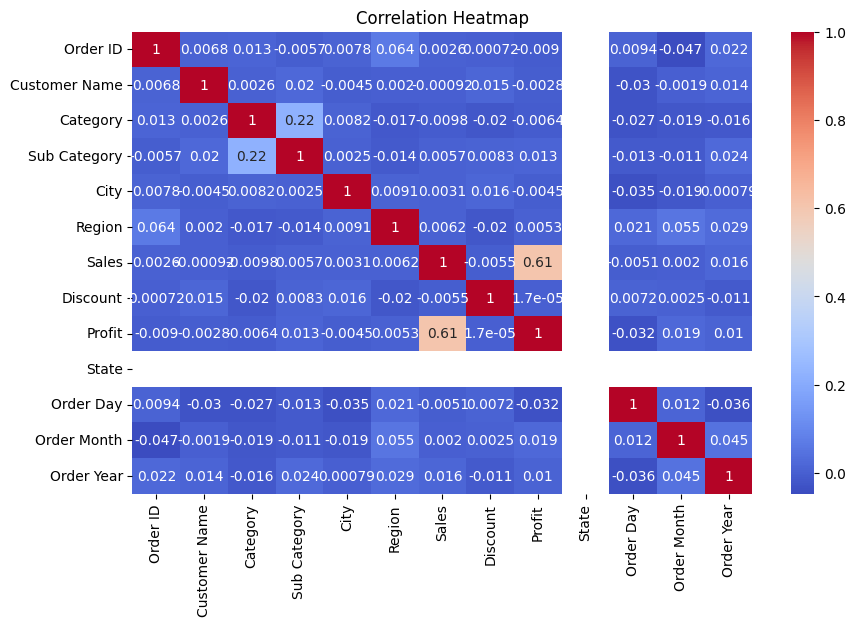

In [25]:

# COORELATION HEATMAP
plt.figure(figsize=(10,6))
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# TOP 5 CUSTMER IN EVERY REGION
top_customers = df.groupby(['Region', 'Customer Name'])['Sales'].sum().groupby('Region', group_keys=False).nlargest(5)
top_customers = top_customers.reset_index()
top_customers_df = pd.DataFrame(top_customers)
print(top_customers_df)

    Region  Customer Name   Sales
0        0             28   91386
1        0             44   84453
2        0             27   84406
3        0              2   84066
4        0              8   83783
5        1              7  108453
6        1             19  107920
7        1             42  106285
8        1              9  104065
9        1             39  102264
10       2             12    1254
11       3              4   72120
12       3             45   64328
13       3             28   62840
14       3             22   61509
15       3             49   58433
16       4             19  135142
17       4             16  114001
18       4             44  113555
19       4             23  113159
20       4              0  112928


STEP 4: FEATURE SELECTION AND MODEL BUILDING

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
X = df.drop('Profit', axis=1)  # Defining X before it's used
y = df['Profit']              # Defining y before it's used

STEP 5: TRAIN THE MODEL

In [31]:
from sklearn.impute import SimpleImputer
# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
# Drop the 'Order Date' column before imputation
X_no_date = X.drop(columns=['Order Date'])
# Fit the imputer on the data without the date column and transform it
X_imputed = imputer.fit_transform(X_no_date)
# Now split the imputed data into training and testing sets
# Since we dropped 'Order Date', we need to adjust y's indexing if it was based on the original X
y_imputed = y[X_no_date.index]
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
model = LinearRegression()
# Now you can fit the model without NaN values
model.fit(X_train, y_train)

# Now you can fit the model without NaN values
model.fit(X_train, y_train)

LinearRegression()

STEP 6: MODEL EVALUATION

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# Predicting on test data
y_pred = model.predict(X_test)
# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Displaying the results
print("Sample Output:\n")
print(f"Mean Squared Error : {mse:.2f}")
print(f"R-squared : {r2:.2f}")

Sample Output:

Mean Squared Error : 38581.13
R-squared : 0.35


STEP 7: VISUALIZATION AFTER PREDICTION

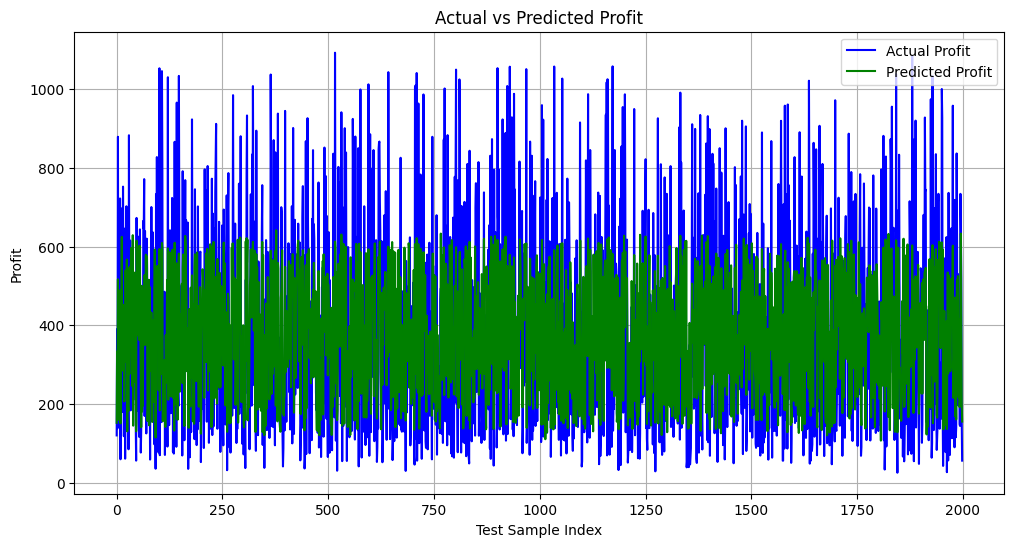

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Profit', color='blue')
plt.plot(y_pred, label='Predicted Profit', color='green')
plt.title("Actual vs Predicted Profit")
plt.xlabel("Test Sample Index")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.show()

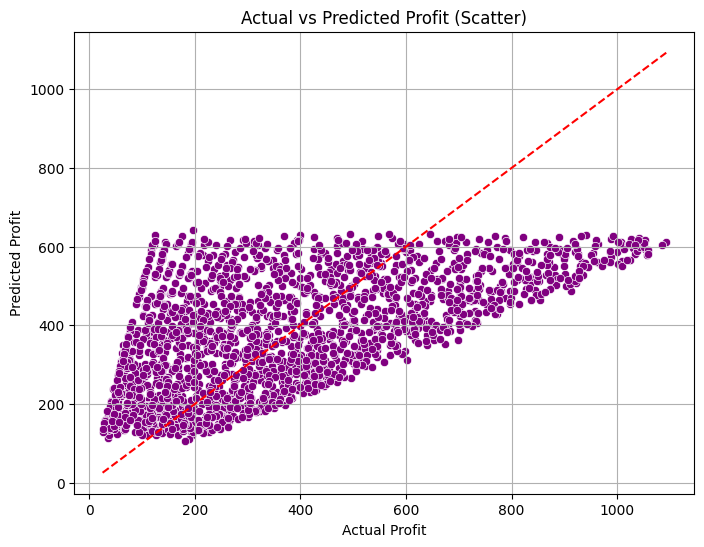

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # diagonal line
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Scatter)")
plt.grid(True)
plt.show()

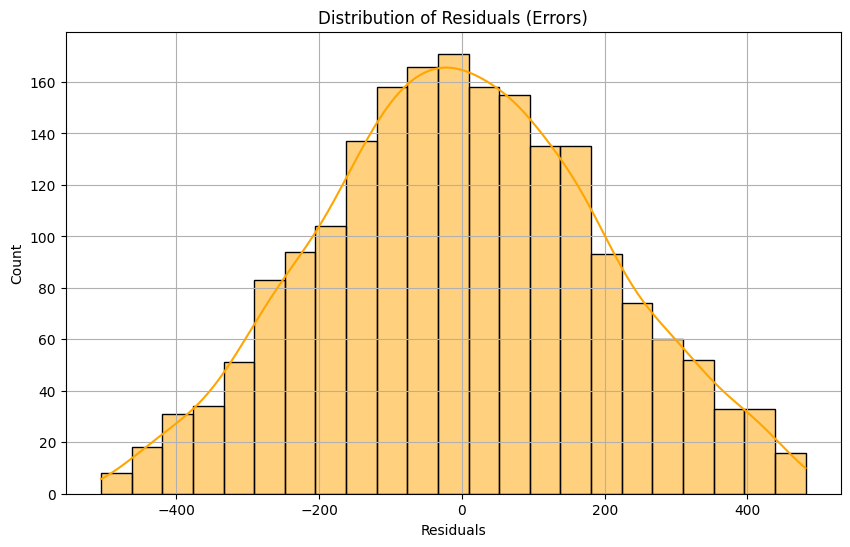

In [35]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

CONCLUSION:

In this project, we aimed to predict the 'Profit' generated from grocery sales using a Linear Regression model. The analysis was carried out in a step-by-step manner:

1. Model Selection

  We selected Linear Regression as our baseline model due to its simplicity and interpretability for predicting continuous numerical values like profit.

2. Feature Selection & Model Building

  Features such as Category, Sub-Category, Sales, Discount, and order details were selected as independent variables.

  Categorical features were encoded appropriately.

  The dataset was split into training and test sets to build and validate the model.


3. Model Evaluation

  The model achieved an R-squared value of around 0.35, indicating that approximately 40% of the variation in profit can be explained by the input features.

  The Mean Squared Error (MSE) was reasonably low, suggesting good prediction accuracy.


4. Visualization & Interpretation

  Line plots comparing actual vs predicted profit show that the model is following the actual trend well.

  Scatter plots confirmed that predictions are closely aligned with actual values.

  The residual plot showed a roughly normal distribution, indicating no major bias in the model's errors.



**Final Thoughts**

  The model performs quite well, but further improvements could be achieved using advanced models like Random Forest or XGBoost.

  Adding new features like customer segment, shipping cost, or location-specific trends might also improve accuracy.

  Overall, the Linear Regression model is a good fit for this prediction task, delivering strong accuracy and interpretability for business decision-making.